In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

from keras.datasets import mnist

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

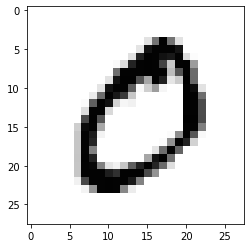

In [3]:
# 시각화
plt.imshow(train_x[1], cmap='Greys')

In [4]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [5]:
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


In [6]:
# 스케일 조정
train_x = train_x / 255
test_x = test_x / 255
train_x = train_x[:, :, :,np.newaxis]
test_x = test_x[:, :, :, np.newaxis]

In [7]:
train_x.shape

(60000, 28, 28, 1)

In [8]:
train_y = np_utils.to_categorical(train_y, 10)
test_y = np_utils.to_categorical(test_y, 10)
train_y.shape

(60000, 10)

In [9]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adam

In [10]:
def LeNet(input_shape, classes) :

    model = Sequential()
    model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Conv2D(50, kernel_size = 5, padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    model.add(Dense(10))
    model.add(Activation("softmax"))
    return model

In [11]:
model = LeNet(input_shape = (28, 28, 1), classes = 10)

In [12]:
# compile : 훈련과정 설정
model.compile(loss = "categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [13]:
# fit: 에포크만큼 훈련
hist = model.fit(train_x, train_y, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 39s 201ms/step - loss: 0.5541 - accuracy: 0.8378 - val_loss: 0.0673 - val_accuracy: 0.9805
Epoch 2/10
188/188 [==============================] - 36s 192ms/step - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.0518 - val_accuracy: 0.9853
Epoch 3/10
188/188 [==============================] - 36s 191ms/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0453 - val_accuracy: 0.9858
Epoch 4/10
188/188 [==============================] - 36s 191ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0391 - val_accuracy: 0.9878
Epoch 5/10
188/188 [==============================] - 36s 191ms/step - loss: 0.0207 - accuracy: 0.9930 - val_loss: 0.0404 - val_accuracy: 0.9890
Epoch 6/10
188/188 [==============================] - 36s 191ms/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0375 - val_accuracy: 0.9896
Epoch 7/10
188/188 [==============================] - 36s 192ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.0405 - val_ac

In [14]:
score = model.evaluate(test_x, test_y, verbose=1)

313/313 [==============================] - 4s 13ms/step - loss: 0.0328 - accuracy: 0.9904


In [15]:
score # loss랑 accuracy

[0.032832901924848557, 0.9904000163078308]

In [16]:
print("손실값: {}, 정확도: {} %".format(score[0], str(score[1] * 100)))

손실값: 0.032832901924848557, 정확도: 99.04000163078308 %


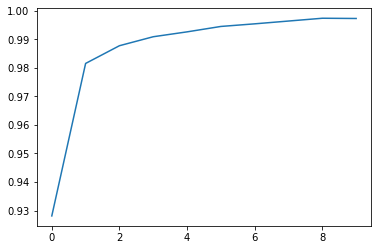

In [17]:
plt.plot(hist.history['accuracy'])

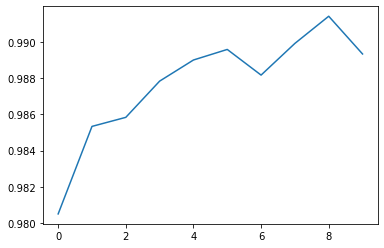

In [18]:
plt.plot(hist.history['val_accuracy'])